Nama - NIM : Jessica Liviana Widiatmo - 2602058112

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl

In [2]:
df = pd.read_csv('data_D.csv')

In [3]:
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,106473,15639576,Sarratt,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,1,62345,15769582,Hanson,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,2,126615,15675888,Austin,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,3,35909,15786617,Tuan,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,4,45175,15757310,Li Fonti,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41259 non-null  int64  
 1   id               41259 non-null  int64  
 2   CustomerId       41259 non-null  int64  
 3   Surname          41259 non-null  object 
 4   CreditScore      41251 non-null  float64
 5   Geography        41259 non-null  object 
 6   Gender           41259 non-null  object 
 7   Age              41259 non-null  float64
 8   Tenure           41259 non-null  int64  
 9   Balance          41259 non-null  float64
 10  NumOfProducts    41259 non-null  int64  
 11  HasCrCard        41259 non-null  int64  
 12  IsActiveMember   41259 non-null  int64  
 13  EstimatedSalary  41259 non-null  float64
 14  churn            41259 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


**Drop Data**

Terdapat beberapa kolom yang tidak berpengaruh pada proses yang ada, seperti 'Unnamed: 0', 'id', 'CustomerId', dan 'Surname'. Maka, kolom-kolom ini dapat di drop.

In [5]:
df = df.drop(['Unnamed: 0','id','CustomerId','Surname'], axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      41251 non-null  float64
 1   Geography        41259 non-null  object 
 2   Gender           41259 non-null  object 
 3   Age              41259 non-null  float64
 4   Tenure           41259 non-null  int64  
 5   Balance          41259 non-null  float64
 6   NumOfProducts    41259 non-null  int64  
 7   HasCrCard        41259 non-null  int64  
 8   IsActiveMember   41259 non-null  int64  
 9   EstimatedSalary  41259 non-null  float64
 10  churn            41259 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 3.5+ MB


Dari informasi tersebut, dapat terlihat bahwa kolom 'Age' memiliki tipe data float, dimana seharusnya age atau umur merupakan bilangan bulat. Maka, tipe data dari 'Age' akan diubah ke integer.

In [7]:
df['Age'] = df['Age'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      41251 non-null  float64
 1   Geography        41259 non-null  object 
 2   Gender           41259 non-null  object 
 3   Age              41259 non-null  int64  
 4   Tenure           41259 non-null  int64  
 5   Balance          41259 non-null  float64
 6   NumOfProducts    41259 non-null  int64  
 7   HasCrCard        41259 non-null  int64  
 8   IsActiveMember   41259 non-null  int64  
 9   EstimatedSalary  41259 non-null  float64
 10  churn            41259 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 3.5+ MB


**Missing Value**

In [9]:
df.isna().sum()

CreditScore        8
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

Terdapat missing value pada kolom 'CreditScore'. Karena jumlahnya tidak banyak jika dibandingkan dengan total data yang ada, maka dapat dilakukan drop data.

In [10]:
df.dropna(inplace = True)

In [11]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

**Outlier**

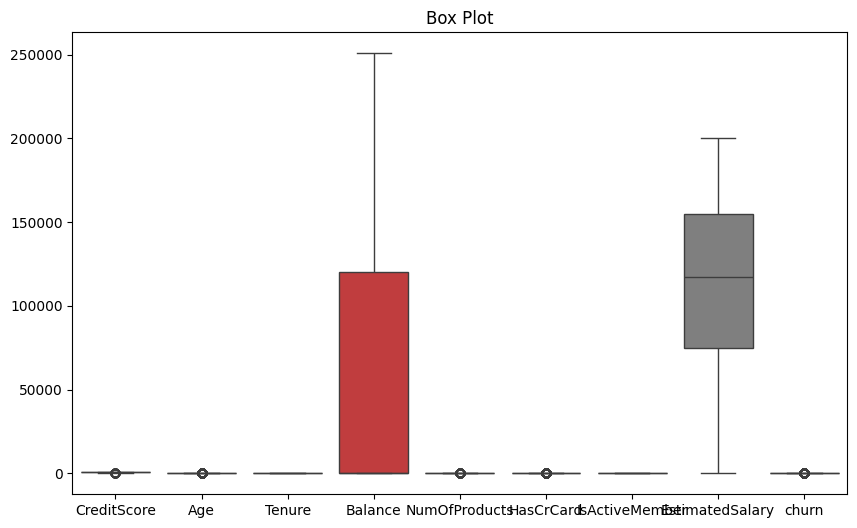

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plot')
plt.show()

**Data Distribution**

In [13]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,41251.000000,41251.000000,41251.000000,41251.000000,41251.000000,41251.000000,41251.000000,41251.000000,41251.000000
mean,656.278733,38.061211,4.999030,55723.301201,1.554362,0.754382,0.496667,112303.655728,0.211268
std,80.062353,8.801304,2.802899,62859.325180,0.545635,0.430458,0.499995,50369.838886,0.408213
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,598.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74580.800000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117036.380000,0.000000
75%,710.000000,42.000000,7.000000,120165.450000,2.000000,1.000000,1.000000,154775.700000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [14]:
df['Geography'].value_counts()

Geography
France     23513
Spain       9080
Germany     8658
Name: count, dtype: int64

In [15]:
df['Gender'].value_counts()

Gender
Male      23163
Female    18088
Name: count, dtype: int64

**Data Splitting**

In [16]:
input_df = df.drop(['churn'], axis=1)
output_df = df['churn']

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.2, random_state=42)

**Data Encoding**

In [18]:
df_encode={"Gender": {"Male":1,"Female" :0}}
x_train = x_train.replace(df_encode)
x_test = x_test.replace(df_encode)

In [19]:
filename = 'genderEncode.pkl'
pkl.dump(df_encode, open(filename, 'wb'))

In [20]:
x_train = pd.get_dummies(x_train, columns=['Geography'], dtype = int)
x_test = pd.get_dummies(x_test, columns=['Geography'], dtype = int)

**Random Forest**

In [21]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
RF_Class = RandomForestClassifier(criterion='gini', max_depth=4)
RF_Class.fit(x_train,y_train)

RandomForestClassifier(max_depth=4)

In [22]:
y_predict =  RF_Class.predict(x_test)

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\nClassification Report\n")
print(classification_report(y_test,y_predict,target_names=['0','1']))
RF_Accuracy = accuracy_score(y_test, y_predict)
print('Random Forest Accuracy:', RF_Accuracy.round(2))
RF_Precision = precision_score(y_test, y_predict)
print('Random Forest Precision:', RF_Precision.round(2))
RF_Recall = recall_score(y_test, y_predict)
print('Random Forest Recall:', RF_Recall.round(2))
RF_F1 = f1_score(y_test, y_predict)
print('Random Forest f1 score:', RF_F1.round(2))


Classification Report

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      6519
           1       0.81      0.32      0.46      1732

    accuracy                           0.84      8251
   macro avg       0.83      0.65      0.68      8251
weighted avg       0.84      0.84      0.81      8251

Random Forest Accuracy: 0.84
Random Forest Precision: 0.81
Random Forest Recall: 0.32
Random Forest f1 score: 0.46


**XGBoost**

In [24]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [25]:
y_pred = XGB.predict(x_test)

In [26]:
print("\nClassification Report\n")
print(classification_report(y_test,y_pred,target_names=['0','1']))
XGB_Accuracy = accuracy_score(y_test, y_pred)
print('XGBoost Accuracy:', XGB_Accuracy.round(2))
XGB_Precision = precision_score(y_test, y_pred)
print('XGBoost Precision:', XGB_Precision.round(2))
XGB_Recall = recall_score(y_test, y_pred)
print('XGBoost Recall:', XGB_Recall.round(2))
XGB_F1 = f1_score(y_test, y_pred)
print('XGBoost f1 score:', XGB_F1.round(2))


Classification Report

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6519
           1       0.70      0.55      0.62      1732

    accuracy                           0.86      8251
   macro avg       0.79      0.74      0.76      8251
weighted avg       0.85      0.86      0.85      8251

XGBoost Accuracy: 0.86
XGBoost Precision: 0.7
XGBoost Recall: 0.55
XGBoost f1 score: 0.62


**Perbandingan Random Forest dan XGBoost**

Random Forest
*   Accuracy: 0.84
*   Precision: 0.77
*   Recall: 0.32
*   F1 score: 0.45

XGBoost
*   Accuracy: 0.86
*   Precision: 0.7
*   Recall: 0.55
*   F1 score: 0.62





Dari perbanding diatas, dapat dilihat bahwa XGBoost memiliki performance yang lebih baik dibandingkan dengan Random Forest.

In [27]:
model = XGBClassifier()

model.fit(x_train, y_train)

filename = 'XGBoostModel.pkl'
pkl.dump(model, open(filename, 'wb'))

loaded_model = pkl.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)


0.8560174524300085
